In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

fast_length = 42
slow_length = 252
figsize = (12, 8)

rawData = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col = 0, parse_dates = True).dropna().round(4)

In [2]:
df = pd.DataFrame(rawData['EUR='])
df.rename(columns = {'EUR=': 'price'}, inplace = True)

In [3]:
df['sma_fast'] = df.price.rolling(fast_length).mean()
df['sma_slow'] = df.price.rolling(slow_length).mean()

C:\Users\bojan\AppData\Local\Temp\ipykernel_44972\55176836.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: title={'center': 'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

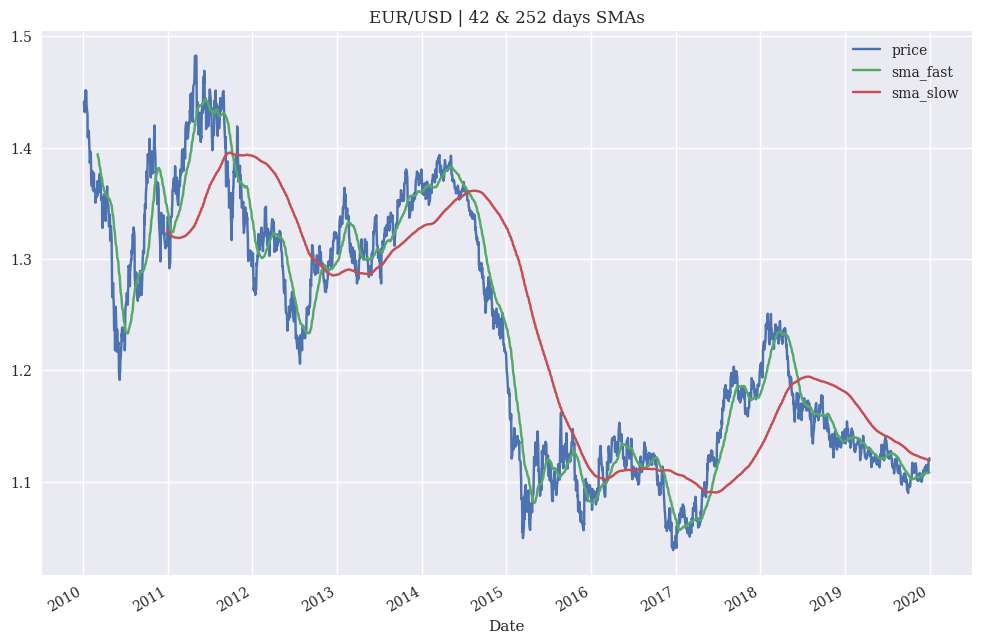

In [4]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

df.plot(title = 'EUR/USD | 42 & 252 days SMAs', figsize = figsize)

<AxesSubplot: title={'center': 'Direction'}, xlabel='Date'>

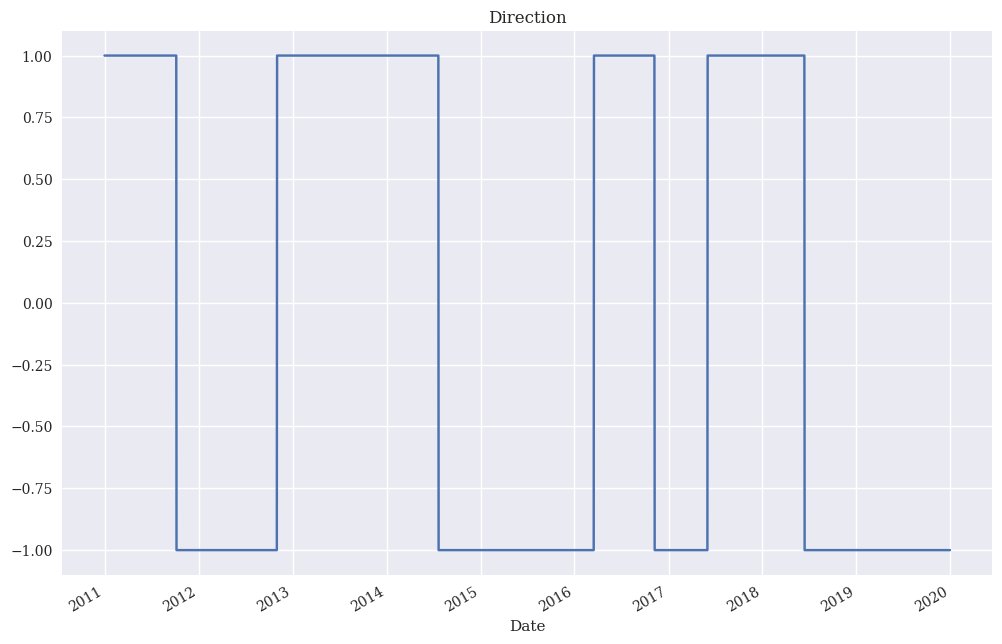

In [5]:
df['direction'] = np.where(df.sma_fast > df.sma_slow, 1, -1)
df.dropna(inplace = True)

df['direction'].plot(ylim = [-1.1, 1.1], title = 'Direction', figsize = figsize)

<AxesSubplot: >

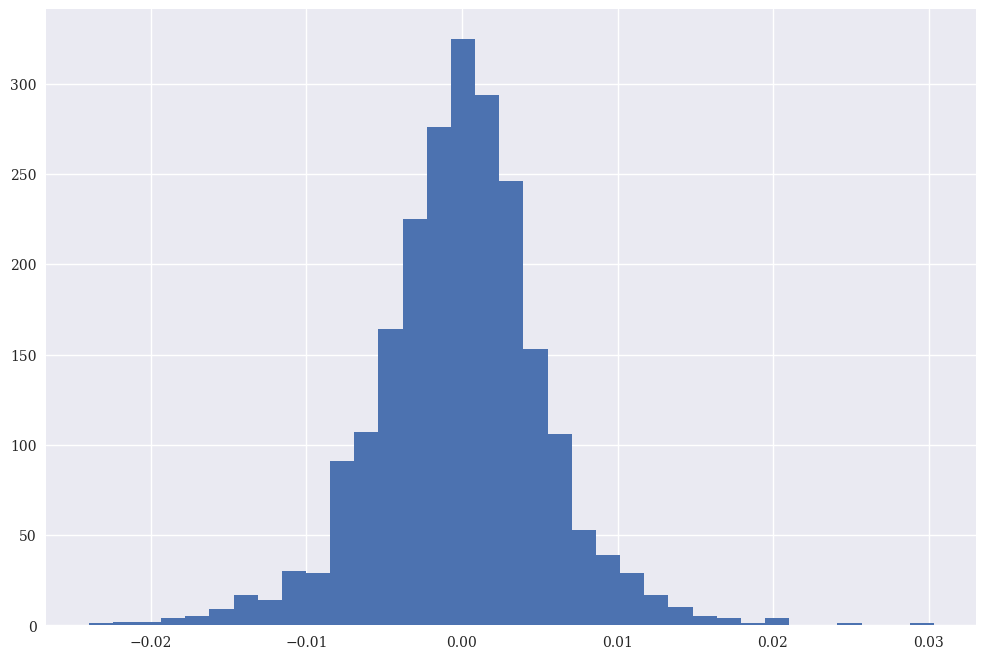

In [6]:
df['returns'] = np.log(df.price / df.price.shift(1))
df['returns'].hist(bins = 35, figsize = figsize)

In [7]:
df.strategy = df.direction.shift(1) * df.returns
df.strategy

C:\Users\bojan\AppData\Local\Temp\ipykernel_44972\3531055926.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.strategy = df.direction.shift(1) * df.returns


Date
2010-12-31         NaN
2011-01-03   -0.001946
2011-01-04   -0.003752
2011-01-05   -0.011341
2011-01-06   -0.011472
                ...   
2019-12-24   -0.000090
2019-12-26   -0.000811
2019-12-27   -0.007094
2019-12-30   -0.001967
2019-12-31   -0.001160
Length: 2265, dtype: float64

In [8]:
df[['returns', 'strategy']].sum()

KeyError: "['strategy'] not in index"

In [ ]:
df[['returns', 'strategy']].sum().apply(np.exp)